# Лабораторная работа 8
### Ремизов Дмитрий


#### Задача  8.1.
Для уравнения второго порядка $-u'' + pu'+qu = f(x)$ найти решение краевой задачи:
\begin{cases}
    -u'' + pu' + qu = f(x), x \in (a,b); \\
    u(a)=u_a, u(b)=u_b;
\end{cases}


#####  ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ
1. Найти аналитическое  решение    задачи  (см.  ПРИЛОЖЕНИE 8.B).
2. Найти приближенное решение задачи с точностью  0.001.
3. На одном чертеже построить  графики приближенного и аналитического  решения задачи. Отдельно построить график погрешности. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy
a = 0
b = 1
p = -1
q = 0.75
e = 0.001
h0 = 0.1

def f(x):
    return 5*x**2-20

Ua = -1
Ub = 1

Найдем аналитически решение краевой задачи: <br>
\begin{cases}
    -y'' -1y' + 0.75y = 5x^2-20, x \in (0,1); \\
    y(0)=-1, y(1)=1;
\end{cases} <br>

Решим характеристическое уравнение: <br>
$-\lambda^2 - \lambda + 0.75 = 0$ <br>
$\lambda_1 = -\frac{3}{2}$ ,
$\lambda_2 = \frac{1}{2}$ 

Найдем общее решение:<br>
$y_0 = C_1e^{-\frac{3}{2}x} + C_2e^{\frac{1}{2}x}$ <br>
Найдем частное решение:<br>
$y_1 = ax^2+bx+c$<br>
$y_1' = 2ax + b$ <br>
$y_1" = 2a$<br>
$-2a - 2ax - b + 0.75(ax^2 + bx + c) = 5x^2 - 20$ <br>

$x^2|$  $0.75a = 5$ $=>$ $a = \frac{20}{3}$<br>
$x|$    $-2a +0.75b = 0$ $=>$ $b = \frac{160}{9}$<br>
$x^0|$  $-2a-b+0.75c = -20$ $=>$ $c = \frac{400}{27}$<br>
$y =  C_1e^{-\frac{3}{2}x} + C_2e^{\frac{1}{2}x} + \frac{20}{3}x^2 + \frac{160}{9}x + \frac{400}{27}$ <br>

Подставим краевые условия:<br>
$y(0) = C_1 + C_2 + \frac{400}{27} = -1$
$y(1) = C_1e^{-\frac{3}{2}} + C_2e^{\frac{1}{2}} + \frac{20}{3} + \frac{160}{9} + \frac{400}{27} = -1$<br>
Отсюда: <br>
$C_1 = -\frac{e^{-\frac{3}{2}}(-1033+427 \sqrt{e})}{27(-1+e^2)}$<br>
$C_2 = -\frac{-427+1033e^{-\frac{3}{2}}}{27(-1+e^2)}$<br>


$y(x) = \frac{1}{27}(180x^2+480x+\frac{(427-1033e^{\frac{3}{2}})e^{\frac{x}{2}}}{-1+e^2} + \frac{(1033 - 427\sqrt{e}) e^{-\frac{3(x-1)}{2}}}{-1+e^2} +400)$

In [2]:
def yF(x):
    return (180*x**2+480*x+((427-1033*np.exp(3/2))*np.exp(x/2))/(-1+np.exp(2))+((1033-427*np.sqrt(np.exp(1)))*np.exp(-3/2*(x-1)))/(-1+np.exp(2))+400)/27


In [3]:
def Approx(a, b, h, Ua, Ub, N):
    global p, q
    ti_1 = a
    ti = a + h
    ui_1 = Ua
    ui = yF(a+h)
    u_mas = []
    t_mas = []
    t_mas = np.array([ti_1, ti])
    u_mas = np.array([ui_1, ui])
    for i in range (1, N):
        ti_2 = ti + h
        ui_2 = -(ui_1*(-1/(h**2) - p/(2*h)) + (2/(h**2) + q)*ui - f(ti))/ (-1/(h**2) + p/(2*h))
        t_mas = np.append(t_mas, [ti_2])
        u_mas = np.append(u_mas, [ui_2])
        ti_1 +=h
        ti += h
        ui_1 = ui
        ui = ui_2
    t_mas = np.append(t_mas, [b])
    u_mas = np.append(u_mas, [Ub])
    return t_mas, u_mas
      
def RApprox(a, b, h, Ua, Ub, e):
    N = int((b-a)/h)
    th, yh = Approx(a, b, h, Ua, Ub, N-1)
    th2, yh2 = Approx(a, b, h/2, Ua, Ub, N*2-1)
    rMax = np.abs(yh2[0]-yh[0])
    for i in range (1, N):
        if (np.abs(yh2[2*i]-yh[i]) > rMax):
            rMax = np.abs(yh2[2*i]-yh[i])
    
    while rMax > e :
        h /= 2
        N *= 2
        th = th2
        yh = yh2
        th2, yh2 = Approx(a, b, h/2, Ua, Ub, N*2-1)
        rMax = np.abs(yh2[0] - yh[0])
        for i in range(1, N):
            if(np.abs(yh2[2*i] - yh[i]) > rMax):
                rMax = np.abs(yh2[2*i] - yh[i])
    print("Approx: N = ", N, "h = ", h/2)
    return th2, yh2
    

Approx: N =  20 h =  0.025


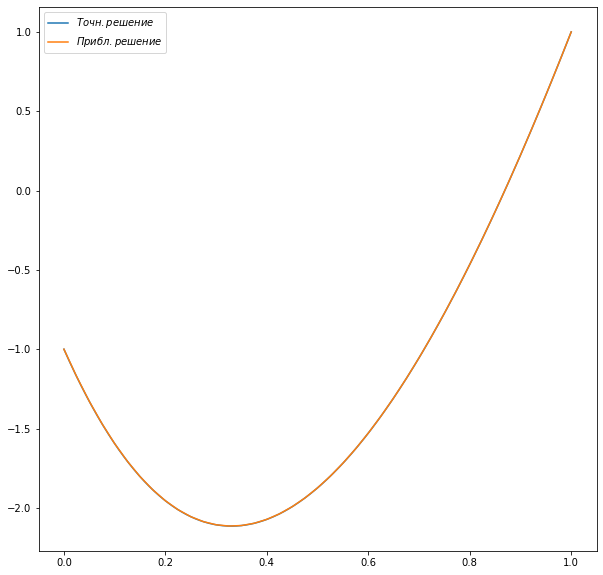

In [4]:
fig, axs = plt.subplots(1,1, figsize = (10, 10))
x_data = np.linspace(a,b, 1000)
y_data = yF(x_data)
axs.plot(x_data, y_data, label = '$Точн. решение$')
x, y = RApprox(a, b, h0, Ua, Ub, e)
axs.plot(x, y, label = '$Прибл. решение$')
axs.legend()

In [5]:
def aF(h):
    global p
    return (-1/(h**2) - p/(2*h))

def bF(h):
    global q
    return (2/(h**2)+q)

def cF(h):
    global p
    return (-1/(h**2) + p/(2*h))


In [6]:
def MatrixSolve(h):
    global a, b, Ua, Ub
    N = int((b-a)/h)
    M = np.zeros((N,N))
    d = np.zeros(N)
    d[0] = Ua
    for i in range (1, N-1):
        d[i] = f(a + h*i)
        for j in range(N):
            if (i == j):
                M[i][j-1] = aF(h)
                M[i][j] = bF(h)
                M[i][j+1] = cF(h)
        #print(M[i], "\n")
    M[0][0] = 1
    M[N-1][N-1] = 1
    d[N-1] = Ub
    d = np.array(d)
    #for i in range (N):
    #    print(M[i], "\n")
    U = np.linalg.solve(M, d)
    return U, h, N    
  
    
def RNormE(V, h):
    global a
    res = []
    for i in range(len(V)):
        res.append(abs(V[i] - yF(a+h*i)))
    return np.array(res)

def Approx1(h, eps):
    U1, h1, N1 = MatrixSolve(h)
    print ("Начальная погрешность", max(RNormE(U1, h1)))
    while (max(RNormE(U1, h1)) > e):
        U1, h1, N1, = MatrixSolve(h1/2)
    print("Погрешность: ", max(RNormE(U1, h1)) ," N = ", N1, "h = ", h1)
    return U1, h1, N1, RNormE(U1, h1) 

Начальная погрешность 0.7768584502688538
Погрешность:  0.0007975355914637827  N =  10240 h =  9.765625e-05


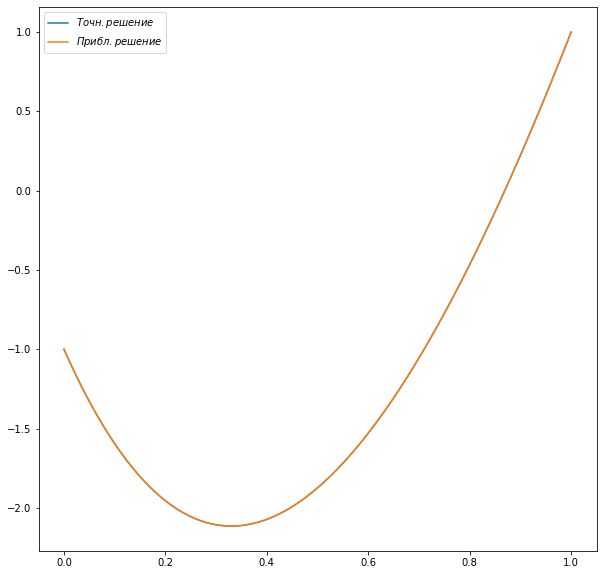

In [7]:
a = 0
b = 1
p = -1
q = 0.75
e = 0.001
h0 = 0.1#'''

def f(x):
    return 5*x**2-20

Ua = -1
Ub = 1

fig, axs = plt.subplots(1,1, figsize = (10, 10))
x_data = np.linspace(a,b, 1000)
y_data = yF(x_data)
axs.plot(x_data, y_data, label = '$Точн. решение$')

u1, h1, N1, R1 = Approx1(h0, e)
x = np.linspace(a, b, N1)
axs.plot(x, u1, label = '$Прибл. решение$')
axs.legend()

#### График погрешности

1.0


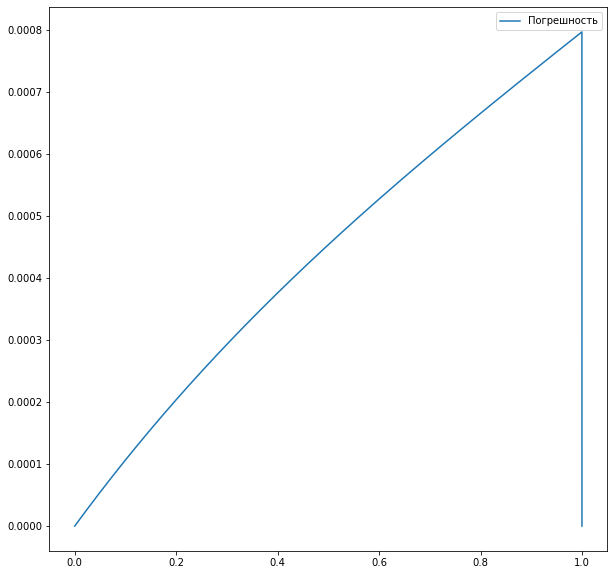

In [8]:
fig, axs = plt.subplots(1,1, figsize = (10, 10))
#x = np.arange(0, Rn1, 1, dtype = int)
print(x[N1-1])
R1[N1-1]=Ua-yF(a)
y1 = R1
axs.plot(x, y1, label = 'Погрешность')
axs.legend()

#### Задача 8.2. 
Стержень составляется  из трех частей одинаковой длины 1 и  с разными  коэффициентами теплопроводности. Концы стержня поддерживаются при постоянной температуре. В каком порядке следует составить части стержня, чтобы  указанная точка  x0 стержня имела максимальную температуру? 
Математически задача формулируется следующим образом:   найти приближенное решение  краевой задачи <br>

\begin{cases}
    -(k(x)u')'+q(x)u = f(x), x \in (a,b);\\
    u(a)=U_a, u(b)=U_b,
\end{cases}

$k(x) = 
\begin{cases}
    k_1(x), если 0\le{x}\ge1,\\
    k_2(x), если 1<x\ge2,\\
    k_3(x), если 2<x\ge3,
\end{cases}$

при каждой конфигурации стержня. Значения q(x) и  f(x)  взять из таблицы 8.1, остальные значения взять в таблице 8.2.  Сравнить полученные значения температуры в фиксированной точке   в каждом варианте.  Выбрать оптимальный результат.

##### ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ
1. Составить подпрограмму, вычисляющую функцию k(x) из индивидуального варианта.
2. Найти приближенное решение задачи с точностью 0.001, модифицируя  разностную схему из  задачи 8.1.
3. Для каждого варианта конфигурации стержня произвести  расчет по разностной схеме. 
4. Построить на одном чертеже графики приближенного решения для каждой конфигурации стержня. 
5. Сравнив полученные решения, выбрать оптимальный результат. 
6. Оформить отчет по задаче.

In [9]:
x0 = 2.6
def k1(x):
    return 9-x

def k2(x):
    return 2**(-x+1)

def k3(x):
    return 7*x**2+2
Ua = 1
Ub = 10
a = 0
b = 3
e = 0.001

In [10]:
def MatrixSolve1(h):
    global a, b, Ua, Ub
    N = int((b-a)/h)
    M = np.zeros((N, N))
    d = np.zeros(N)
    d[0] = Ua
    for i in range (1, N-1):
        d[i] = f(a + h*1)
        for j in range (N):
            ti = a + h*i
            if (i == j):
                if (ti >= 0) and (ti <= 1):
                    M[i][j-1] = -k1(ti - h/2)/(h**2)
                    M[i][j] = k1(ti + h/2)/(h**2) + k1(ti - h/2)/(h**2) + q
                    M[i][j+1] = -k1(ti + h/2)/(h**2)
                    
                if (ti > 1) and (ti <= 2):
                    M[i][j-1] = -k2(ti - h/2)/(h**2)
                    M[i][j] = k2(ti + h/2)/(h**2) + k2(ti - h/2)/(h**2) + q
                    M[i][j+1] = -k2(ti + h/2)/(h**2)
                    
                if (ti > 2) and (ti <= 3):
                    M[i][j-1] = -k3(ti - h/2)/(h**2)
                    M[i][j] = k3(ti + h/2)/(h**2) + k3(ti - h/2)/(h**2) + q
                    M[i][j+1] = -k3(ti + h/2)/(h**2)
    M[0][0] = 1
    M[N-1][N-1] = 1
    d[N-1] = Ub
    U = np.linalg.solve(M, d)
    return U, h, N
          
'''U1, h1, N1 = MatrixSolve1(0.01)
for i in range(N):
    print(U1[i], '\n')#'''

"U1, h1, N1 = MatrixSolve1(0.01)\nfor i in range(N):\n    print(U1[i], '\n')#"

In [11]:
def MatrixSolve2(h):
    global a, b, Ua, Ub
    N = int((b-a)/h)
    M = np.zeros((N, N))
    d = np.zeros(N)
    d[0] = Ua
    for i in range (1, N-1):
        d[i] = f(a + h*1)
        for j in range (N):
            ti = a + h*i
            if (i == j):
                if (ti >= 0) and (ti <= 1):
                    M[i][j-1] = -k1(ti - h/2)/(h**2)
                    M[i][j] = k1(ti + h/2)/(h**2) + k1(ti - h/2)/(h**2) + q
                    M[i][j+1] = -k1(ti + h/2)/(h**2)
                    
                if (ti > 1) and (ti <= 2):
                    M[i][j-1] = -k3(ti - h/2)/(h**2)
                    M[i][j] = k3(ti + h/2)/(h**2) + k3(ti - h/2)/(h**2) + q
                    M[i][j+1] = -k3(ti + h/2)/(h**2)
                    
                if (ti > 2) and (ti <= 3):
                    M[i][j-1] = -k2(ti - h/2)/(h**2)
                    M[i][j] = k2(ti + h/2)/(h**2) + k2(ti - h/2)/(h**2) + q
                    M[i][j+1] = -k2(ti + h/2)/(h**2)
    M[0][0] = 1
    M[N-1][N-1] = 1
    d[N-1] = Ub
    U = np.linalg.solve(M, d)
    return U, h, N

'''U1, h1, N1 = MatrixSolve2(0.01)
for i in range(N):
    print(U1[i], '\n')#'''

"U1, h1, N1 = MatrixSolve2(0.01)\nfor i in range(N):\n    print(U1[i], '\n')#"

In [12]:
def MatrixSolve3(h):
    global a, b, Ua, Ub
    N = int((b-a)/h)
    M = np.zeros((N, N))
    d = np.zeros(N)
    d[0] = Ua
    for i in range (1, N-1):
        d[i] = f(a + h*1)
        for j in range (N):
            ti = a + h*i
            if (i == j):
                if (ti >= 0) and (ti <= 1):
                    M[i][j-1] = -k2(ti - h/2)/(h**2)
                    M[i][j] = k2(ti + h/2)/(h**2) + k2(ti - h/2)/(h**2) + q
                    M[i][j+1] = -k2(ti + h/2)/(h**2)
                    
                if (ti > 1) and (ti <= 2):
                    M[i][j-1] = -k1(ti - h/2)/(h**2)
                    M[i][j] = k1(ti + h/2)/(h**2) + k1(ti - h/2)/(h**2) + q
                    M[i][j+1] = -k1(ti + h/2)/(h**2)
                    
                if (ti > 2) and (ti <= 3):
                    M[i][j-1] = -k3(ti - h/2)/(h**2)
                    M[i][j] = k3(ti + h/2)/(h**2) + k3(ti - h/2)/(h**2) + q
                    M[i][j+1] = -k3(ti + h/2)/(h**2)
    M[0][0] = 1
    M[N-1][N-1] = 1
    d[N-1] = Ub
    U = np.linalg.solve(M, d)
    return U, h, N

In [13]:
def MatrixSolve4(h):
    global a, b, Ua, Ub
    N = int((b-a)/h)
    M = np.zeros((N, N))
    d = np.zeros(N)
    d[0] = Ua
    for i in range (1, N-1):
        d[i] = f(a + h*1)
        for j in range (N):
            ti = a + h*i
            if (i == j):
                if (ti >= 0) and (ti <= 1):
                    M[i][j-1] = -k2(ti - h/2)/(h**2)
                    M[i][j] = k2(ti + h/2)/(h**2) + k2(ti - h/2)/(h**2) + q
                    M[i][j+1] = -k2(ti + h/2)/(h**2)
                    
                if (ti > 1) and (ti <= 2):
                    M[i][j-1] = -k3(ti - h/2)/(h**2)
                    M[i][j] = k3(ti + h/2)/(h**2) + k3(ti - h/2)/(h**2) + q
                    M[i][j+1] = -k3(ti + h/2)/(h**2)
                    
                if (ti > 2) and (ti <= 3):
                    M[i][j-1] = -k1(ti - h/2)/(h**2)
                    M[i][j] = k1(ti + h/2)/(h**2) + k1(ti - h/2)/(h**2) + q
                    M[i][j+1] = -k1(ti + h/2)/(h**2)
    M[0][0] = 1
    M[N-1][N-1] = 1
    d[N-1] = Ub
    U = np.linalg.solve(M, d)
    return U, h, N

In [14]:
def MatrixSolve5(h):
    global a, b, Ua, Ub
    N = int((b-a)/h)
    M = np.zeros((N, N))
    d = np.zeros(N)
    d[0] = Ua
    for i in range (1, N-1):
        d[i] = f(a + h*1)
        for j in range (N):
            ti = a + h*i
            if (i == j):
                if (ti >= 0) and (ti <= 1):
                    M[i][j-1] = -k3(ti - h/2)/(h**2)
                    M[i][j] = k3(ti + h/2)/(h**2) + k3(ti - h/2)/(h**2) + q
                    M[i][j+1] = -k3(ti + h/2)/(h**2)
                    
                if (ti > 1) and (ti <= 2):
                    M[i][j-1] = -k1(ti - h/2)/(h**2)
                    M[i][j] = k1(ti + h/2)/(h**2) + k1(ti - h/2)/(h**2) + q
                    M[i][j+1] = -k1(ti + h/2)/(h**2)
                    
                if (ti > 2) and (ti <= 3):
                    M[i][j-1] = -k2(ti - h/2)/(h**2)
                    M[i][j] = k2(ti + h/2)/(h**2) + k2(ti - h/2)/(h**2) + q
                    M[i][j+1] = -k2(ti + h/2)/(h**2)
    M[0][0] = 1
    M[N-1][N-1] = 1
    d[N-1] = Ub
    U = np.linalg.solve(M, d)
    return U, h, N

In [15]:
def MatrixSolve6(h):
    global a, b, Ua, Ub
    N = int((b-a)/h)
    M = np.zeros((N, N))
    d = np.zeros(N)
    d[0] = Ua
    for i in range (1, N-1):
        d[i] = f(a + h*1)
        for j in range (N):
            ti = a + h*i
            if (i == j):
                if (ti >= 0) and (ti <= 1):
                    M[i][j-1] = -k3(ti - h/2)/(h**2)
                    M[i][j] = k3(ti + h/2)/(h**2) + k3(ti - h/2)/(h**2) + q
                    M[i][j+1] = -k3(ti + h/2)/(h**2)
                    
                if (ti > 1) and (ti <= 2):
                    M[i][j-1] = -k2(ti - h/2)/(h**2)
                    M[i][j] = k2(ti + h/2)/(h**2) + k2(ti - h/2)/(h**2) + q
                    M[i][j+1] = -k2(ti + h/2)/(h**2)
                    
                if (ti > 2) and (ti <= 3):
                    M[i][j-1] = -k1(ti - h/2)/(h**2)
                    M[i][j] = k1(ti + h/2)/(h**2) + k1(ti - h/2)/(h**2) + q
                    M[i][j+1] = -k1(ti + h/2)/(h**2)
    M[0][0] = 1
    M[N-1][N-1] = 1
    d[N-1] = Ub
    U = np.linalg.solve(M, d)
    return U, h, N

In [16]:
def RNormE2(V1, V2):
    res = []
    for i in range(len(V1)):
        res.append(abs(V1[i] - V2[i*2]))
    return np.array(res)

def Approx2(h, e, num):
    if num == 1:
        U1, h1, N1 = MatrixSolve1(h)
        U2, h2, N2 = MatrixSolve1(h/2)
    elif num == 2:
        U1, h1, N1 = MatrixSolve2(h)
        U2, h2, N2 = MatrixSolve2(h/2)
    elif num == 3:
        U1, h1, N1 = MatrixSolve3(h)
        U2, h2, N2 = MatrixSolve3(h/2)
    elif num == 4:
        U1, h1, N1 = MatrixSolve4(h)
        U2, h2, N2 = MatrixSolve4(h/2)
    elif num == 5:
        U1, h1, N1 = MatrixSolve5(h)
        U2, h2, N2 = MatrixSolve5(h/2)
    elif num == 6:
        U1, h1, N1 = MatrixSolve6(h)
        U2, h2, N2 = MatrixSolve6(h/2)
     #---------------------------------   
     #---------------------------------  
    i = 0
    while ((max(RNormE2(U1,U2))) > e) and (h2*2 > e):
        
        U1 = copy.copy(U2)
        if num == 1:
            U2, h2, N2 = MatrixSolve1(h2/2)
        elif num == 2:
            U2, h2, N2 = MatrixSolve2(h2/2)
        elif num == 3:
            U2, h2, N2 = MatrixSolve3(h2/2)
        elif num == 4:
            U2, h2, N2 = MatrixSolve4(h2/2)
        elif num == 5:
            U2, h2, N2 = MatrixSolve5(h2/2)
        elif num == 6:
            U2, h2, N2 = MatrixSolve6(h2/2)
        i+=1
        print(i)
    print("Точность : ", max(RNormE2(U1,U2)), "h = ", h2, "N = ", N2)
    return U2, h2, N2

1
2
3
4
5
6
7
Точность :  0.0034452364772192823 h =  0.000390625 N =  7680
1
2
3
4
5
6
7
Точность :  0.02403536779019788 h =  0.000390625 N =  7680
1
2
3
4
5
6
7
Точность :  0.0016607055700461615 h =  0.000390625 N =  7680
1
2
3
4
5
6
7
Точность :  0.0030031929451030948 h =  0.000390625 N =  7680
1
2
3
4
5
6
7
Точность :  0.024179146615530556 h =  0.000390625 N =  7680
1
2
3
4
5
6
7
Точность :  0.008333901190454185 h =  0.000390625 N =  7680


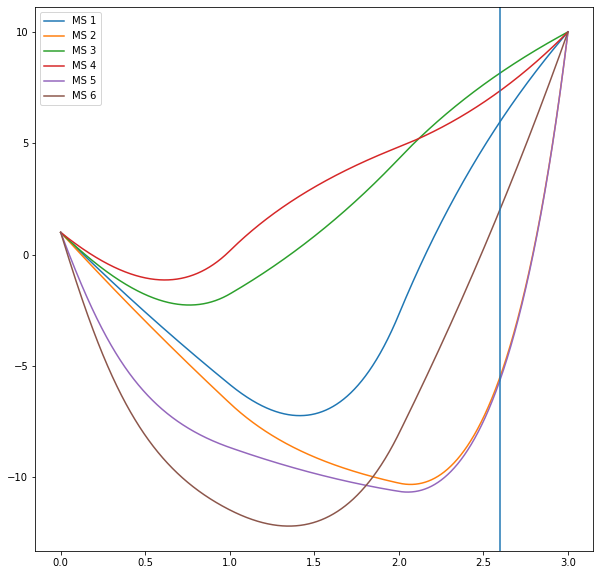

In [17]:
fig, axs = plt.subplots(figsize=(10, 10))


for i in range (0, 6):
    U, h, N = Approx2(0.1, e, i+1)
    x = np.linspace(a, b, N)
    axs.plot(x, U, label ='MS '+ str(i+1))
axs.axvline(x0)
axs.legend()

Наименьшая погрешность  и наибольшая теплопроводность в точке $x_0 = 2.6$ оказалась у конфигурации под номером 3.<br>
Неплохо показали себя конфигурация 3, 4 и 6, но графики у нах неоптимальные.<br>
#### Вывод:
"Красота" графиков и точность решений связана с видом уравнений коэффицентов k и модулем производной на отрезке (те конфигурации, в которых линейная ф-ция была на отрезке 2 сходятся точнее остальных)